In [1097]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import random

original_df = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

In [1111]:
# Init only once
top_score = 0
best_clf = DecisionTreeClassifier(max_depth = 4)
useless_keep = []

In [1112]:

while(top_score < .91):
    campaign = pd.DataFrame(original_df)
    campaign['y'] = campaign['y'].astype("category")
    campaign['y'] = campaign['y'].map({'no':0,'yes':1})
    y = campaign[['y']]
    campaign = campaign.drop('y',axis=1)

    # code section one must run before this every time
    campaign = campaign.dropna()

    # leave out useless vars
    # These are vars that seemingly have no effect on the outcome
    # we already knew day_of_week was useless
    campaign = campaign.drop(['day_of_week','contact', 'job'],axis=1)

    # turn objects into dummies or integers if we can
    cat_list = ['marital', 'default', 'housing', 'loan',
                'month','education','poutcome']
    
    for cat in cat_list:
        campaign[cat] = campaign[cat].astype("category")
    campaign = pd.get_dummies(campaign, columns = cat_list, drop_first= True)


    X_train, X_test, y_train, y_test = train_test_split(campaign, y, test_size=.4)
    # class weight increases chances of a 1/ a yes
    new_clf = DecisionTreeClassifier(max_depth = 5, splitter='random', 
            class_weight={0:1, 1:1.5}, min_samples_split=2, min_samples_leaf=1)
    new_clf.fit(X_train, y_train)
    score = new_clf.score(X_test, y_test)
    if score > top_score:
        top_score = score
        best_clf = new_clf
    print("current score: " + str(score))
    print("top score: " + str(top_score))

current score: 0.892770434313461
top score: 0.892770434313461
current score: 0.896344753169679
top score: 0.896344753169679
current score: 0.8978284326949015
top score: 0.8978284326949015
current score: 0.9007283517669274
top score: 0.9007283517669274
current score: 0.8938494739681684
top score: 0.9007283517669274
current score: 0.8950633935797141
top score: 0.9007283517669274
current score: 0.8905449150256272
top score: 0.9007283517669274
current score: 0.8982330725654167
top score: 0.9007283517669274
current score: 0.892770434313461
top score: 0.9007283517669274
current score: 0.8925681143782034
top score: 0.9007283517669274
current score: 0.8968168330186135
top score: 0.9007283517669274
current score: 0.8889937955219854
top score: 0.9007283517669274
current score: 0.8989074723496089
top score: 0.9007283517669274
current score: 0.896007553277583
top score: 0.9007283517669274
current score: 0.9008632317237658
top score: 0.9008632317237658
current score: 0.8958052333423253
top score: 0

KeyboardInterrupt: 

In [1121]:
from sklearn.metrics import f1_score, confusion_matrix

In [1113]:
y_pred = best_clf.predict(X_test)
f1 = f1_score(y_test, y_pred)
f1

0.38846615939126955

In [1122]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[12816   290]
 [ 1237   485]]


In [1009]:
best_clf.max_depth

4

In [1115]:
keep_this_clf = best_clf
keep_this_score = top_score
keep_this_score

0.9035608308605341

In [1116]:
# Prediction Data to replace test data
campaign = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test.csv")
# campaign = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test.csv")


In [1047]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             4119 non-null   int64   
 1   marital         4119 non-null   category
 2   default         4119 non-null   category
 3   housing         4119 non-null   category
 4   loan            4119 non-null   category
 5   month           4119 non-null   category
 6   day_of_week     4119 non-null   category
 7   campaign        4119 non-null   int64   
 8   pdays           4119 non-null   int64   
 9   previous        4119 non-null   int64   
 10  poutcome        4119 non-null   category
 11  emp.var.rate    4119 non-null   float64 
 12  cons.price.idx  4119 non-null   float64 
 13  cons.conf.idx   4119 non-null   float64 
 14  euribor3m       4119 non-null   float64 
 15  nr.employed     4119 non-null   float64 
dtypes: category(7), float64(5), int64(4)
memory usage: 319.2 KB


In [1117]:
# code section one must run before this every time
campaign = campaign.dropna()

campaign = campaign.drop(['day_of_week','contact', 'job'],axis=1)

# turn objects into dummies or integers if we can
cat_list = ['marital', 'default', 'housing', 'loan',
            'month','education','poutcome']

campaign.loc[0, "default"] = "yes"
for cat in cat_list:
    campaign[cat] = campaign[cat].astype("category")
campaign = pd.get_dummies(campaign, columns = cat_list, drop_first= True)
campaign.head()


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,marital_married,...,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,poutcome_nonexistent,poutcome_success
0,26,2,999,0,1.4,93.918,-42.7,4.962,5228.1,True,...,False,False,True,False,False,False,False,False,True,False
1,33,1,999,0,-1.8,92.893,-46.2,1.344,5099.1,True,...,False,False,False,True,False,False,False,False,True,False
2,45,1,3,2,-1.7,94.055,-39.8,0.739,4991.6,False,...,False,False,False,False,False,False,True,False,False,True
3,37,12,999,0,1.4,94.465,-41.8,4.959,5228.1,False,...,False,False,False,True,False,False,False,False,True,False
4,34,1,999,0,-0.1,93.200,-42.0,4.120,5195.8,False,...,False,False,False,True,False,False,False,False,True,False


In [1072]:
best_clf.feature_names_in_

array(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'marital_married', 'marital_single', 'marital_unknown',
       'default_unknown', 'default_yes', 'housing_unknown', 'housing_yes',
       'loan_unknown', 'loan_yes', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent',
       'poutcome_success'], dtype=object)

In [1118]:

y_test2 = pd.Series(best_clf.predict(campaign))
predictions = pd.DataFrame(y_test2, columns=['predictions'])

file_name = f"teamthree-module2-predictions.csv"
predictions.to_csv(file_name, index= False)
predictions.head()

,predictions
0,0
1,0
2,1
3,0
4,0


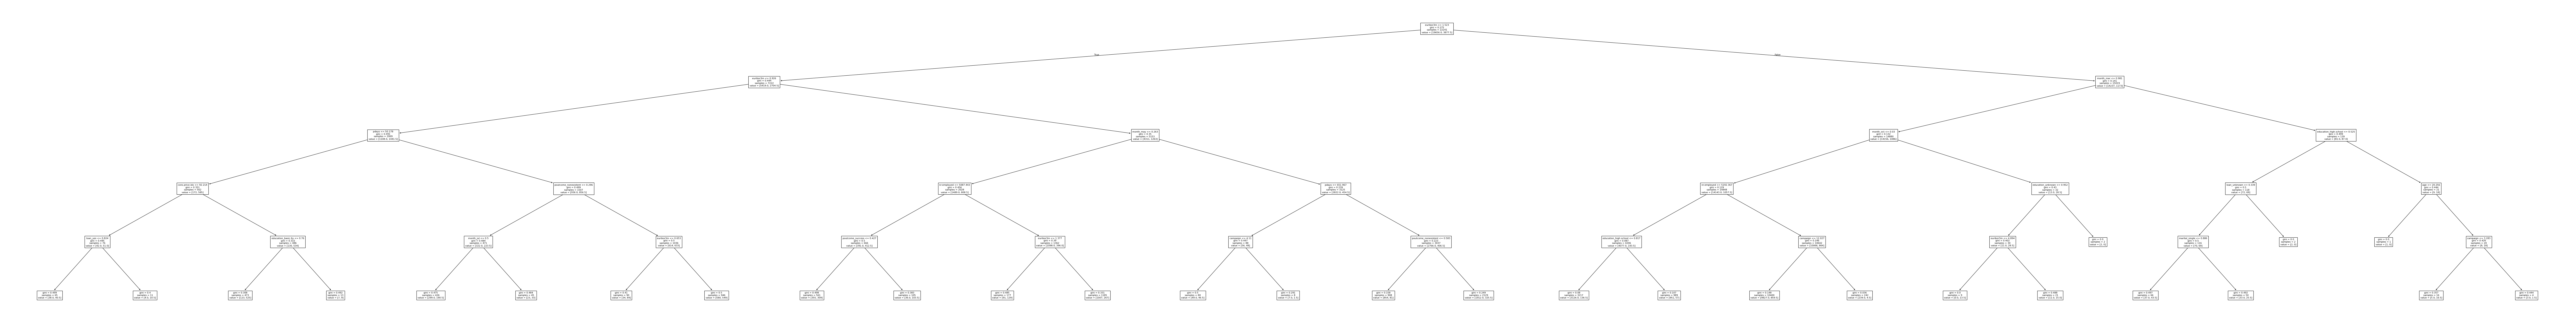

In [1119]:
clf = best_clf
fig_clf, ax_clf = plt.subplots(figsize=(160,20))
tree.plot_tree(clf, fontsize=8, feature_names = campaign.columns)
plt.show()

In [7]:
#Skip
import matplotlib.pyplot as plt
import itertools

In [8]:
#Skip
ys = campaign['y'].value_counts()
ys.head()

y
no     32861
yes     4208
Name: count, dtype: int64

In [9]:
subs = campaign[['age', 'job_int', 'marital_int', 'education_int', 'default_int', 'housing_int', 'loan_int', 'contact_int',
            'month_int', 'campaign', 'pdays','previous','poutcome_int', 'emp.var.rate', 'cons.price.idx',
            'cons.conf.idx','euribor3m','nr.employed']]
subs = subs.drop(useless, axis = 1)
subs.describe()

,age,marital_int,default_int,housing_int,loan_int,month_int,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.00000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000
mean,40.025493,1.173029,0.208557,1.074806,0.325447,4.23146,2.564407,962.221803,0.173730,0.081526,93.576551,-40.494829,3.621945,5167.010650
std,10.435288,0.608166,0.406482,0.985045,0.721717,2.31931,2.764084,187.531477,0.496159,1.572287,0.579339,4.628895,1.734496,72.294476
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,0.000000,0.000000,0.000000,3.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,1.000000,0.000000,2.000000,0.000000,4.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,2.000000,0.000000,2.000000,0.000000,6.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,3.000000,2.000000,2.000000,2.000000,9.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


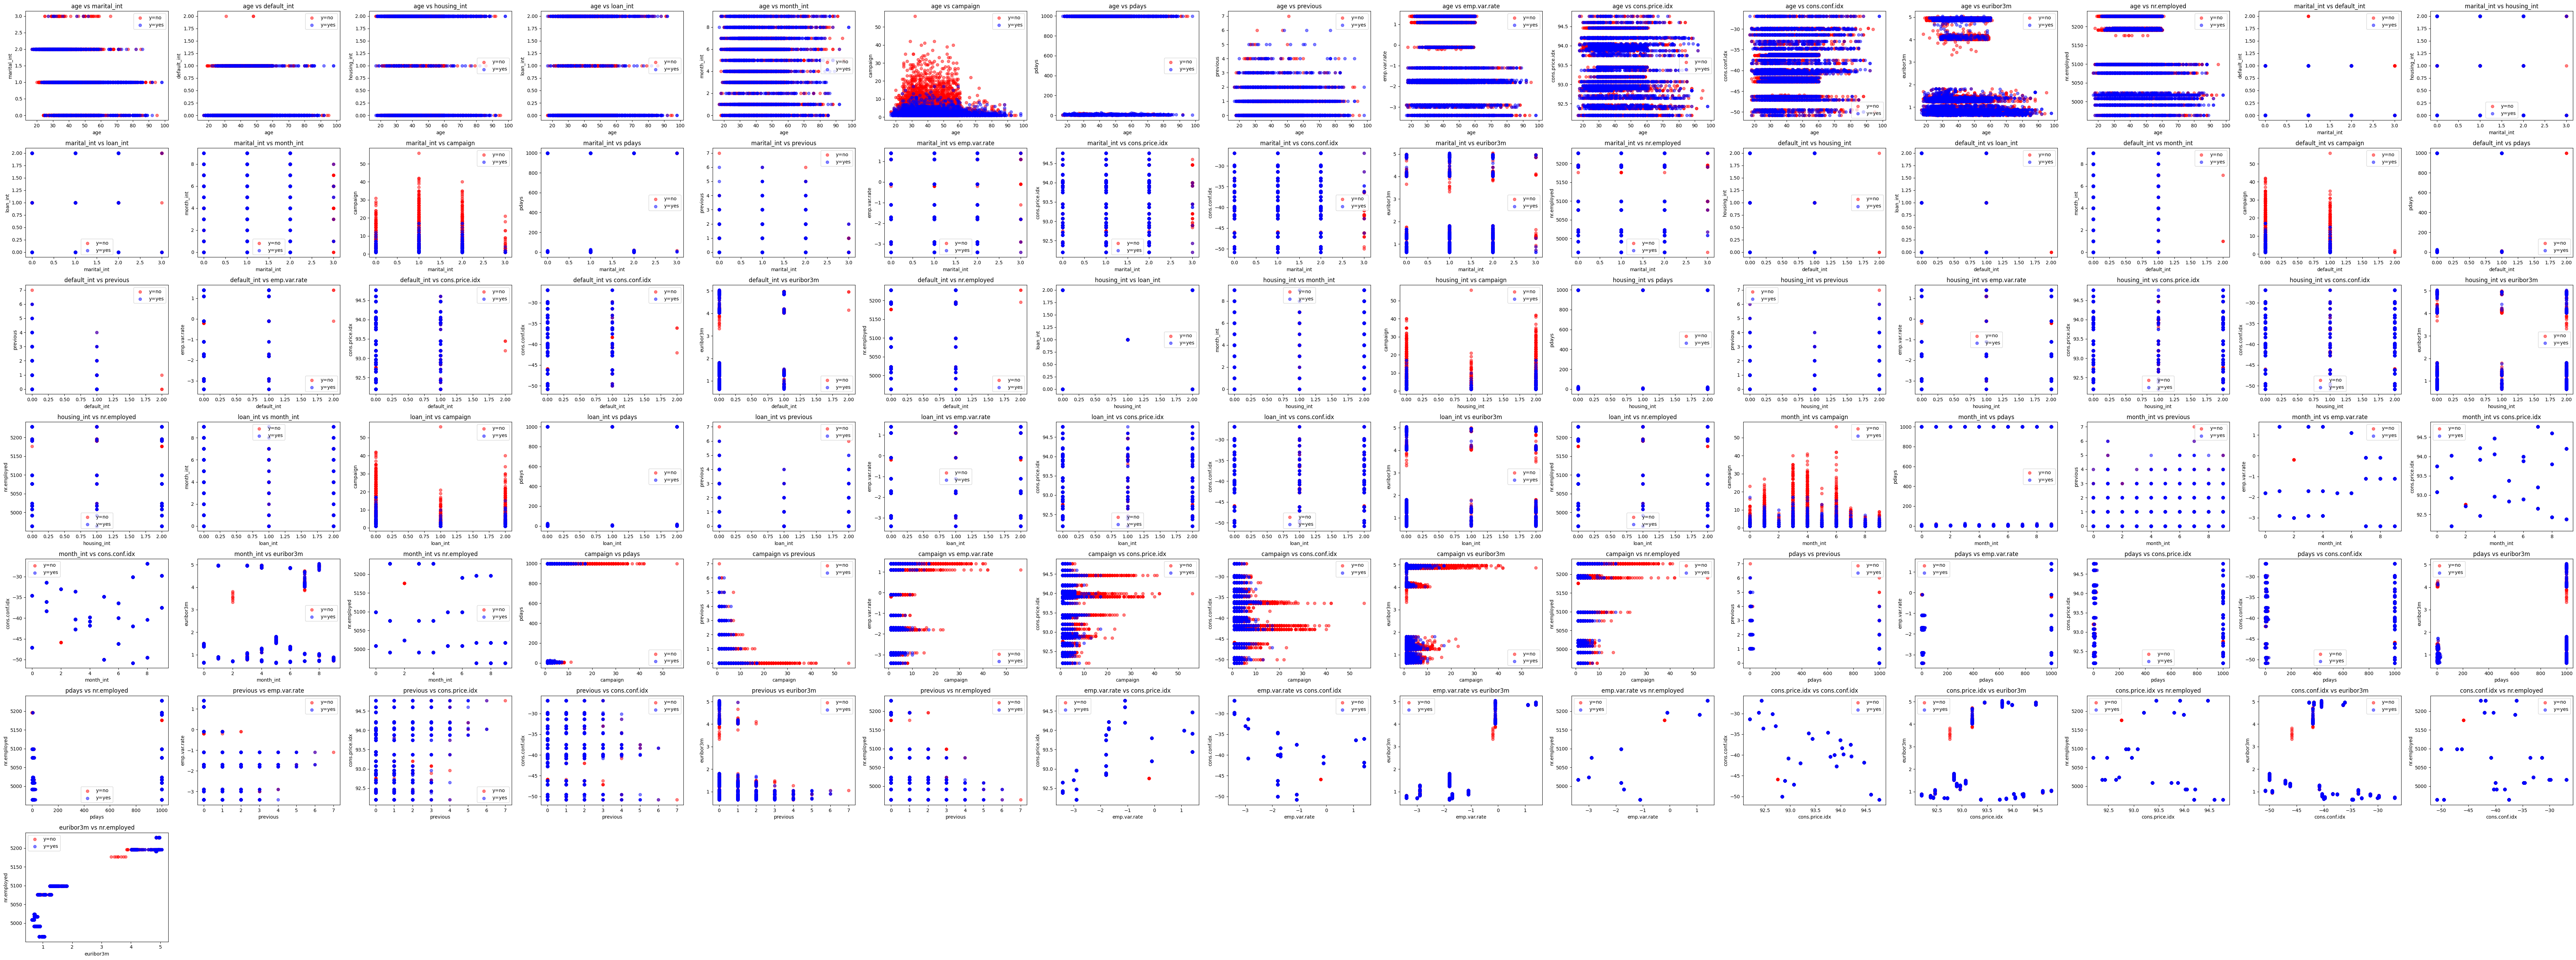

In [10]:

color_col = campaign['y']
columns = subs.columns
pairs = list(itertools.combinations(columns, 2))

# color based on the y output
my_colors = {'no': 'red', 'yes': 'blue'}

cols = 15
rows = (len(pairs) + cols - 1) // cols
work_percentage = rows * cols

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols,4 * rows))
axes = axes.flatten()

for i, (col1, col2) in enumerate(pairs):
    ax = axes[i]
    for y_value, color in my_colors.items():
        filtered = campaign.query("y == @y_value")
        ax.scatter(filtered[col1], filtered[col2],
            alpha = 0.5, label = f'y={y_value}', color = color)
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.set_title(f'{col1} vs {col2}')
    ax.legend()

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

0.8984353925006744
0.8489344483409765


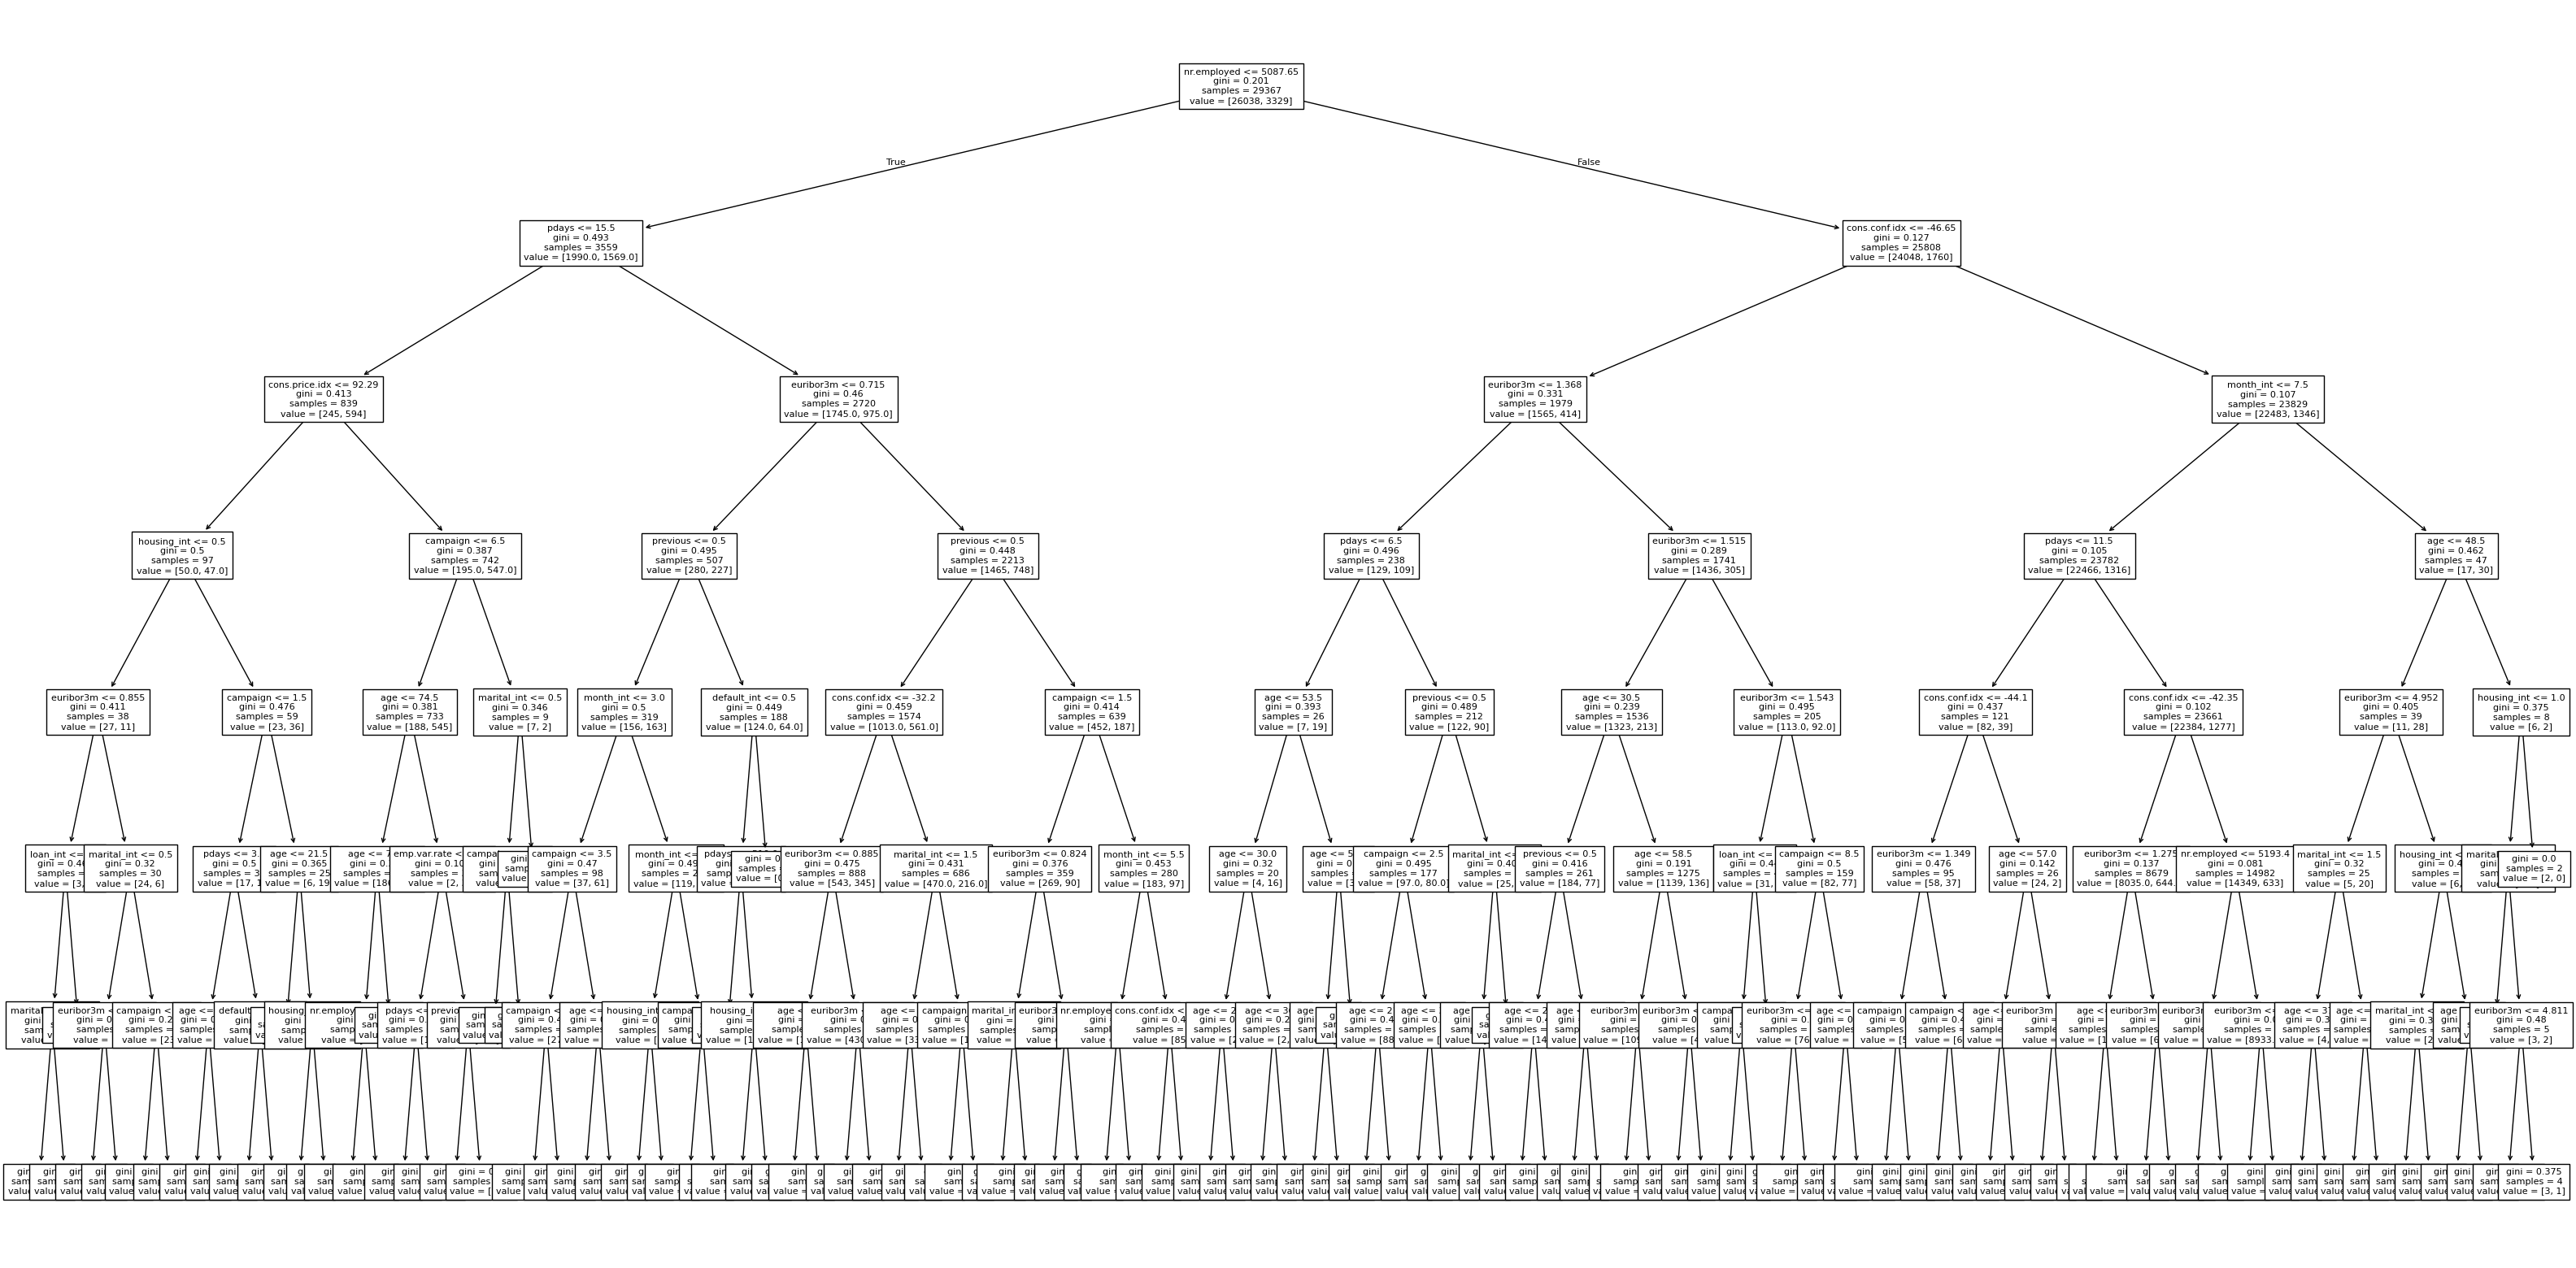

In [11]:
cut = 20
left_indices = X_train['campaign'] < 15
right_indices = X_train['campaign'] >= 15

left_tree = DecisionTreeClassifier(max_depth = 7)
left_tree.fit(X_train[left_indices], y_train[left_indices])

right_tree = DecisionTreeClassifier(max_depth = 7)
right_tree.fit(X_train[right_indices], y_train[right_indices])


print(left_tree.score(X_test, y_test))
print(right_tree.score(X_test, y_test))

fig_clf, ax_clf = plt.subplots(figsize=(40,20))
tree.plot_tree(left_tree, fontsize=8, feature_names = X.columns)
plt.show()

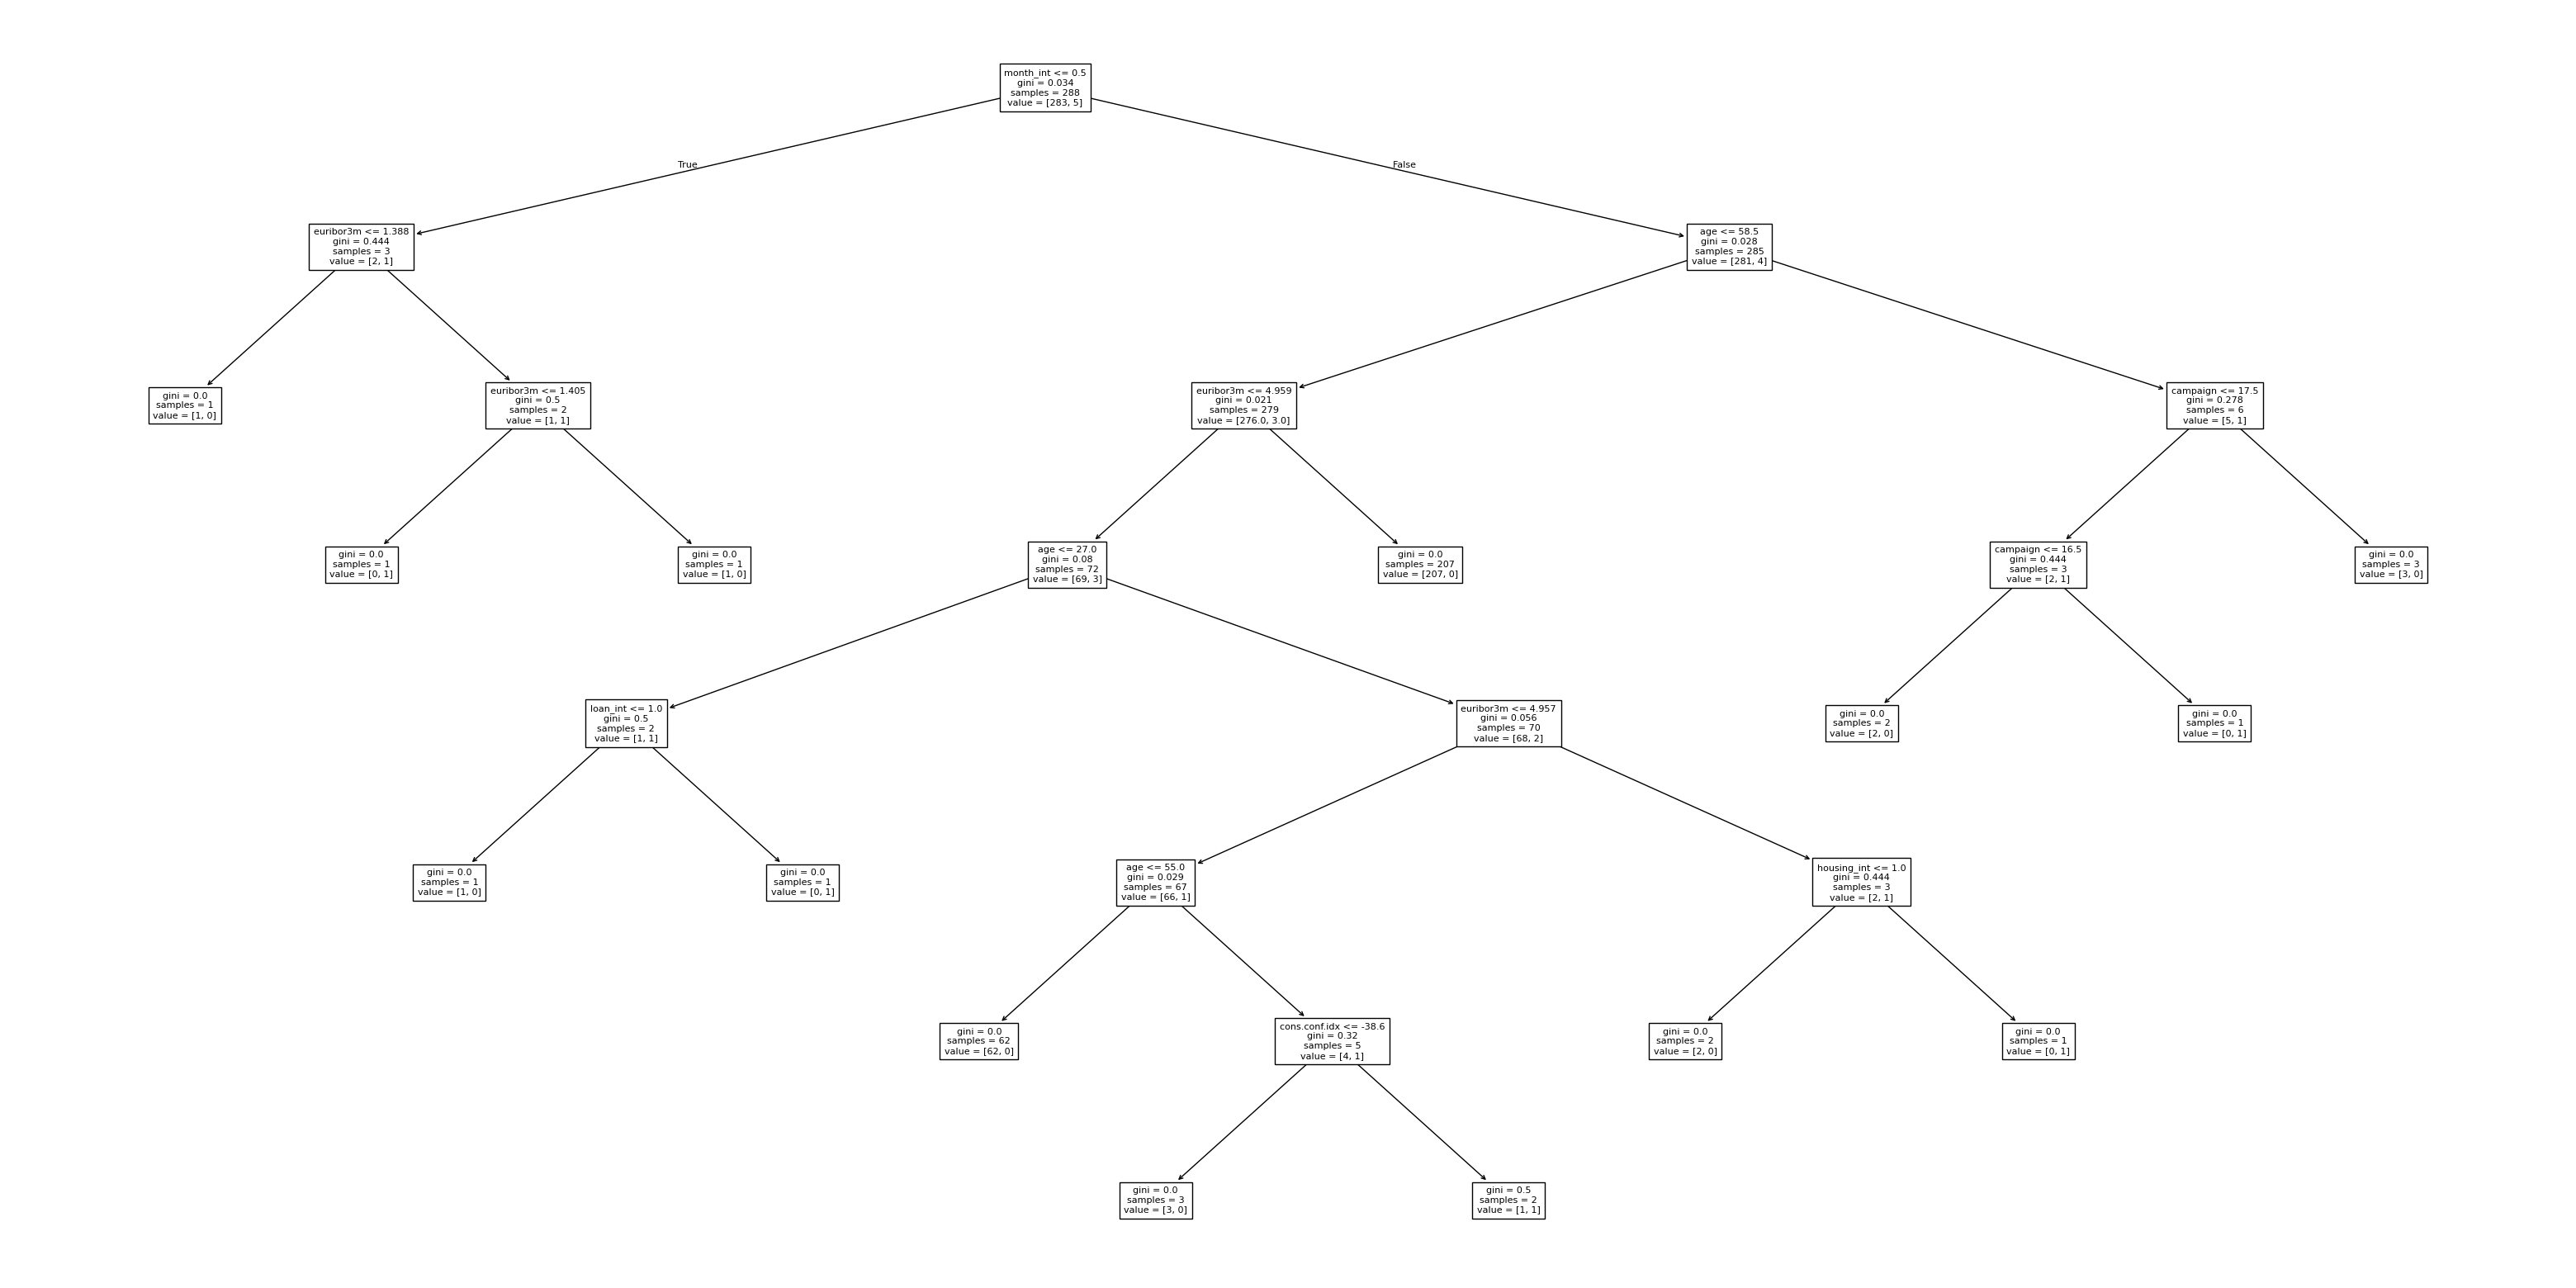

In [12]:
fig_2, ax_2 = plt.subplots(figsize=(40,20))
tree.plot_tree(right_tree, fontsize=8, feature_names = X.columns)
plt.show()